In [ ]:
from preprocess import *


## in preprocess our we had to split our dataset before we imputed ' ' the monthly charges column with the mean and then cast the column as float.  


In [ ]:
df=get_telco_tidy()

In [ ]:
train_telco,validate_telco,test_telco=telco_split(df,stratify='churn_encoded')
## The imputing happens in this step

In [ ]:
df=train_telco

In [ ]:
df.info()

In [ ]:
cols=set(df.columns)
numcols={'tenure','monthly_charges','total_charges'}
catcols=cols-numcols
cat_wo_churn=catcols-{'churn_encoded'}
cat_vs_num=list(product(numcols,catcols))
no_churn_vs=list(product(numcols,cat_wo_churn))
numcols_2_combos=list(combinations(numcols,2))
catcols_2_combos=list(combinations(cat_wo_churn,2))##
 ## These sets are created to run through my statistical and visual tests.      

In [ ]:
df[list(numcols)].hist(lw=0,
          bins=25,
          layout=(-1, 4),
          figsize=(20, 4),
          edgecolor='white',
         
          );

In [ ]:
for i in list(numcols):

    sns.histplot(x=df[i],hue=df['churn_encoded'])
    plt.show()


In [ ]:
num_to_num(df,numcols_2_combos)


In [ ]:
for i in numcols_2_combos:
    scatter_churn(df,x=i[0],y=i[1])
    plt.show()

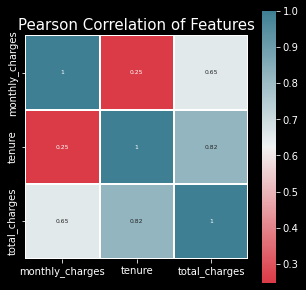

In [30]:
figlen=len(list(numcols))+2

plt.figure(figsize=(figlen,figlen))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(df[list(numcols)].corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':6 })
plt.show()

In [ ]:
chi2=cat_to_cat(df,(catcols_2_combos))

In [ ]:
chi2[chi2['Chi Square p'].astype(float)<chi2['Chi Square p'].astype(float).quantile(.09)].sort_values('Chi Square p')

In [ ]:
manwhit=cat_to_num(df,no_churn_vs)